# Linear Regression 
based neural network using keras and tensorflow

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('Ecommerce Customers')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

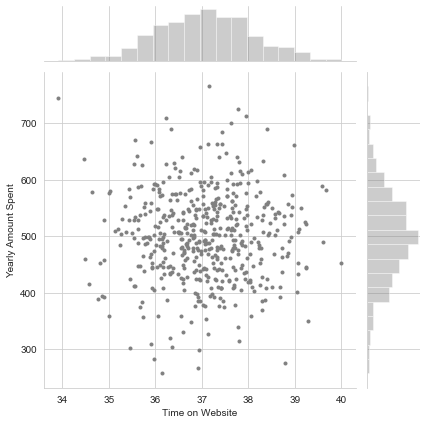

In [7]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df,color='grey',marker='.')

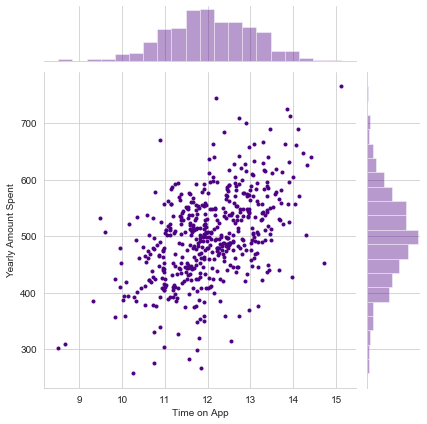

In [8]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df,color='indigo',marker='.')

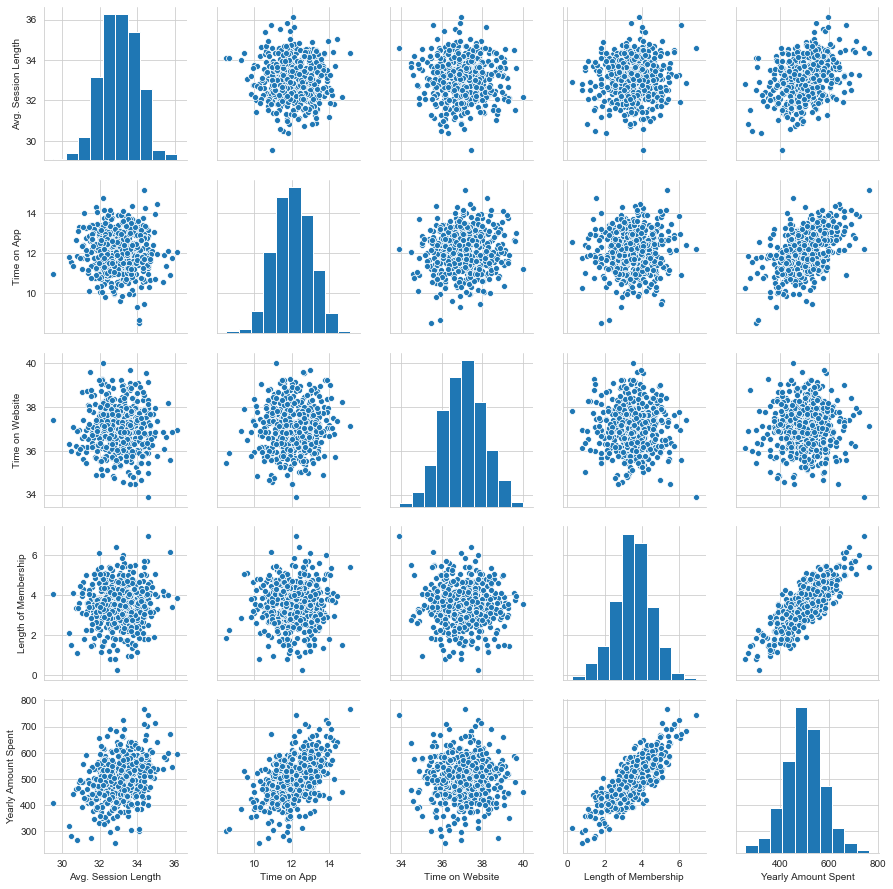

In [9]:
sns.pairplot(df)

In [10]:
len(df['Avatar'].unique())

138

SInce more number of avatars so classification on that is scosidered exhaustive

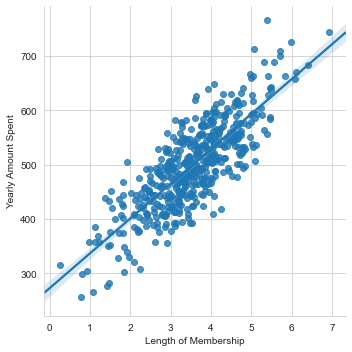

In [11]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

In [12]:
import cufflinks as cf
cf.go_offline()

In [13]:
df.iplot(x='Length of Membership',y='Yearly Amount Spent',kind='scatter',mode='markers',xTitle='Length of Membership',
         yTitle='Yearly Amount Spent')

In [14]:
x=df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=df['Yearly Amount Spent']
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

need to make them in to array othherwise keras wont understand

In [16]:
X_train = X_train.values
X_test = X_test.values

In [17]:
y_train = y_train.values
y_test = y_test.values

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Neural Network Model Creation

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense

In [23]:
X_train.shape

(400, 4)

In [113]:
model = Sequential()

In [114]:
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation = 'relu'))

In [115]:
model.add(Dense(1))

In [116]:
model.compile(optimizer='adam',loss='mse')

In [117]:
model.fit(x= X_train,y = y_train, validation_data=(X_test,y_test),epochs=500)

Train on 400 samples, validate on 100 samples
Epoch 1/500
400/400 [==============================] - 1s 2ms/sample - loss: 253494.0163 - val_loss: 267794.0175
Epoch 2/500
400/400 [==============================] - 0s 85us/sample - loss: 253315.7650 - val_loss: 267611.1475
Epoch 3/500
400/400 [==============================] - 0s 88us/sample - loss: 253142.3463 - val_loss: 267432.0775
Epoch 4/500
400/400 [==============================] - 0s 83us/sample - loss: 252973.2244 - val_loss: 267257.2369
Epoch 5/500
400/400 [==============================] - 0s 80us/sample - loss: 252808.0850 - val_loss: 267083.5538
Epoch 6/500
400/400 [==============================] - 0s 80us/sample - loss: 252644.2094 - val_loss: 266912.4594
Epoch 7/500
400/400 [==============================] - 0s 95us/sample - loss: 252483.3025 - val_loss: 266741.4213
Epoch 8/500
400/400 [==============================] - 0s 98us/sample - loss: 252320.7225 - val_loss: 266570.7144
Epoch 9/500
400/400 [======================

Epoch 72/500
400/400 [==============================] - 0s 90us/sample - loss: 194665.9750 - val_loss: 204844.9088
Epoch 73/500
400/400 [==============================] - 0s 88us/sample - loss: 192657.5550 - val_loss: 202718.4944
Epoch 74/500
400/400 [==============================] - 0s 118us/sample - loss: 190622.5269 - val_loss: 200550.2681
Epoch 75/500
400/400 [==============================] - 0s 80us/sample - loss: 188543.0363 - val_loss: 198354.7769
Epoch 76/500
400/400 [==============================] - 0s 80us/sample - loss: 186452.1244 - val_loss: 196119.5431
Epoch 77/500
400/400 [==============================] - 0s 80us/sample - loss: 184308.8913 - val_loss: 193864.3381
Epoch 78/500
400/400 [==============================] - 0s 85us/sample - loss: 182145.8969 - val_loss: 191579.8131
Epoch 79/500
400/400 [==============================] - 0s 90us/sample - loss: 179958.0800 - val_loss: 189260.9062
Epoch 80/500
400/400 [==============================] - 0s 78us/sample - loss: 

400/400 [==============================] - 0s 80us/sample - loss: 28560.1527 - val_loss: 30199.7444
Epoch 144/500
400/400 [==============================] - 0s 80us/sample - loss: 27142.5883 - val_loss: 28707.2238
Epoch 145/500
400/400 [==============================] - 0s 93us/sample - loss: 25748.1422 - val_loss: 27290.4051
Epoch 146/500
400/400 [==============================] - 0s 118us/sample - loss: 24430.2931 - val_loss: 25918.9885
Epoch 147/500
400/400 [==============================] - 0s 73us/sample - loss: 23161.4467 - val_loss: 24601.0013
Epoch 148/500
400/400 [==============================] - 0s 80us/sample - loss: 21932.9135 - val_loss: 23354.5848
Epoch 149/500
400/400 [==============================] - 0s 80us/sample - loss: 20768.8364 - val_loss: 22134.1360
Epoch 150/500
400/400 [==============================] - 0s 88us/sample - loss: 19651.3527 - val_loss: 20952.9277
Epoch 151/500
400/400 [==============================] - 0s 80us/sample - loss: 18552.7868 - val_loss

Epoch 216/500
400/400 [==============================] - 0s 138us/sample - loss: 2248.8933 - val_loss: 2936.6475
Epoch 217/500
400/400 [==============================] - 0s 105us/sample - loss: 2244.3543 - val_loss: 2931.0686
Epoch 218/500
400/400 [==============================] - 0s 93us/sample - loss: 2240.0800 - val_loss: 2926.0026
Epoch 219/500
400/400 [==============================] - 0s 90us/sample - loss: 2236.8403 - val_loss: 2920.5449
Epoch 220/500
400/400 [==============================] - 0s 83us/sample - loss: 2232.7933 - val_loss: 2915.6425
Epoch 221/500
400/400 [==============================] - 0s 90us/sample - loss: 2229.2278 - val_loss: 2910.9513
Epoch 222/500
400/400 [==============================] - 0s 103us/sample - loss: 2226.1934 - val_loss: 2906.0120
Epoch 223/500
400/400 [==============================] - 0s 88us/sample - loss: 2222.5100 - val_loss: 2901.7595
Epoch 224/500
400/400 [==============================] - 0s 95us/sample - loss: 2219.5791 - val_loss:

Epoch 289/500
400/400 [==============================] - 0s 108us/sample - loss: 2039.3595 - val_loss: 2653.0239
Epoch 290/500
400/400 [==============================] - 0s 93us/sample - loss: 2036.2181 - val_loss: 2648.8497
Epoch 291/500
400/400 [==============================] - 0s 98us/sample - loss: 2033.0154 - val_loss: 2644.1756
Epoch 292/500
400/400 [==============================] - 0s 88us/sample - loss: 2030.2649 - val_loss: 2640.4699
Epoch 293/500
400/400 [==============================] - 0s 85us/sample - loss: 2027.1154 - val_loss: 2635.5785
Epoch 294/500
400/400 [==============================] - 0s 95us/sample - loss: 2023.8916 - val_loss: 2630.9978
Epoch 295/500
400/400 [==============================] - 0s 115us/sample - loss: 2020.7629 - val_loss: 2627.1629
Epoch 296/500
400/400 [==============================] - 0s 85us/sample - loss: 2017.0407 - val_loss: 2622.5699
Epoch 297/500
400/400 [==============================] - 0s 88us/sample - loss: 2014.5984 - val_loss: 

Epoch 362/500
400/400 [==============================] - 0s 98us/sample - loss: 1770.7068 - val_loss: 2296.1945
Epoch 363/500
400/400 [==============================] - 0s 95us/sample - loss: 1766.6408 - val_loss: 2291.1595
Epoch 364/500
400/400 [==============================] - 0s 123us/sample - loss: 1762.5532 - val_loss: 2285.4782
Epoch 365/500
400/400 [==============================] - 0s 85us/sample - loss: 1758.3799 - val_loss: 2279.7644
Epoch 366/500
400/400 [==============================] - 0s 83us/sample - loss: 1754.1285 - val_loss: 2274.6596
Epoch 367/500
400/400 [==============================] - 0s 93us/sample - loss: 1749.7797 - val_loss: 2268.3093
Epoch 368/500
400/400 [==============================] - 0s 88us/sample - loss: 1746.0989 - val_loss: 2263.0042
Epoch 369/500
400/400 [==============================] - 0s 93us/sample - loss: 1741.2720 - val_loss: 2256.6149
Epoch 370/500
400/400 [==============================] - 0s 153us/sample - loss: 1736.9817 - val_loss: 

Epoch 435/500
400/400 [==============================] - 0s 330us/sample - loss: 1432.4521 - val_loss: 1848.3278
Epoch 436/500
400/400 [==============================] - 0s 310us/sample - loss: 1427.5121 - val_loss: 1841.4393
Epoch 437/500
400/400 [==============================] - 0s 335us/sample - loss: 1422.7054 - val_loss: 1834.4663
Epoch 438/500
400/400 [==============================] - 0s 340us/sample - loss: 1417.4499 - val_loss: 1828.9173
Epoch 439/500
400/400 [==============================] - 0s 295us/sample - loss: 1412.1738 - val_loss: 1821.7202
Epoch 440/500
400/400 [==============================] - 0s 330us/sample - loss: 1407.0779 - val_loss: 1814.9127
Epoch 441/500
400/400 [==============================] - 0s 313us/sample - loss: 1402.0406 - val_loss: 1808.2839
Epoch 442/500
400/400 [==============================] - 0s 338us/sample - loss: 1397.1728 - val_loss: 1801.4867
Epoch 443/500
400/400 [==============================] - 0s 383us/sample - loss: 1392.1305 - val

MODEL EVALUATION

In [118]:
losses = pd.DataFrame(model.history.history)

right

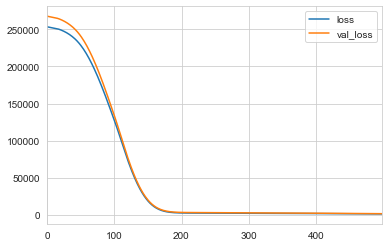

In [119]:
losses.plot()

In [120]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [121]:
predict = model.predict(X_test)

In [122]:
mean_absolute_error(y_test,predict)

28.827533894415637

In [123]:
mean_squared_error(y_test, predict)

1404.5825718922665

In [124]:
np.sqrt(mean_squared_error(y_test, predict))

37.477761030940286

In [125]:
df['Yearly Amount Spent'].describe()

count    500.000000
mean     499.314038
std       79.314782
min      256.670582
25%      445.038277
50%      498.887875
75%      549.313828
max      765.518462
Name: Yearly Amount Spent, dtype: float64

In [126]:
explained_variance_score(y_test, predict)

0.8190375204192721

Text(0, 0.5, 'Predicted Yearly amount spent')

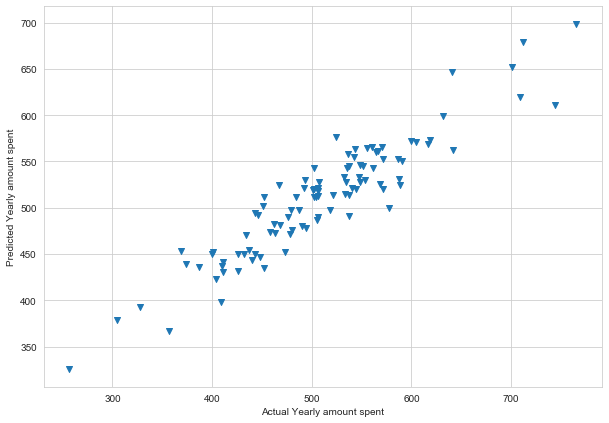

In [127]:
plt.figure(figsize=(10,7))
plt.scatter(y_test,predict,marker='v')
plt.xlabel('Actual Yearly amount spent')
plt.ylabel('Predicted Yearly amount spent')

In [128]:
model.save('Annual amount spent by customer.h5')